<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Cambria";'>
Data Plotting ....
<a class="anchor" id="1"></a> 

<img src="https://www.dotnetlovers.com/Images/Irisspeciesscatterplot928201821341AM.png" width=300></img>

- Data Loading
- OUtliers depicting 

In [1]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("../data/HousePrice1.csv" , index_col=0)

In [2]:
df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
271,272,20,RL,73.0,39104,Pave,NaN,IR1,Low,AllPub,...,0,2008,WD,Normal,241500,1824,0,2.0,0.866025,-0.500000
485,486,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,2009,WD,Normal,147000,1377,200,1.0,-0.500000,-0.866025
565,566,70,RL,66.0,6858,Pave,NaN,Reg,Bnk,AllPub,...,0,2010,WD,Normal,128000,1022,202,2.5,0.500000,-0.866025


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [3]:
df.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'PoolArea', 'PoolQC', 'Fence',
       'MiscFeature', 'MiscVal', 'YrSold', 

![](../imgs/featureEngin.png)

In [4]:
#  pivolt table  for median SalePrice regarding     OverallQual  
#OverallQual جدول تحديد الوسيط لتصنيفات المتغير  
median_SalePrice_OvalQ= pd.pivot_table(df, index="OverallQual", values="SalePrice" , aggfunc="median")
median_SalePrice_OvalQ

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108000.0
5,133000.0
6,160000.0
7,200141.0
8,269750.0
9,345000.0


### Feature Plotting

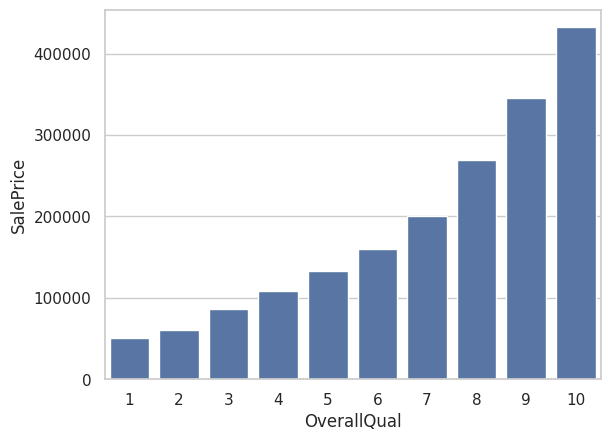

In [5]:
#  سعر العقار في ضوء تصنيفه
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
_=sns.barplot( x="OverallQual", y="SalePrice", data=median_SalePrice_OvalQ.reset_index())

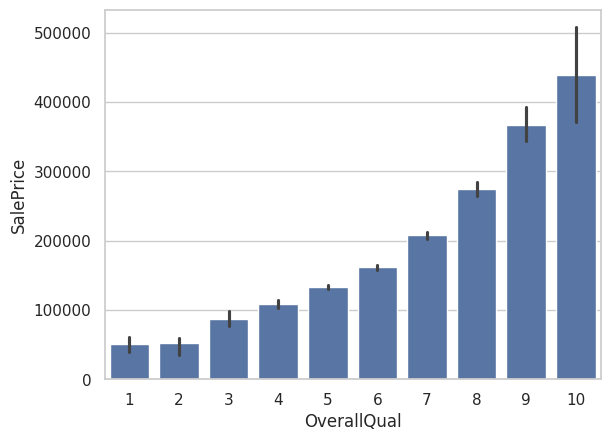

In [6]:
#معدل  سعر العقار في ضوء تصنيفه
import numpy as np
_=sns.barplot( x="OverallQual", y="SalePrice", data=df , estimator=np.mean) #, capsize=True)

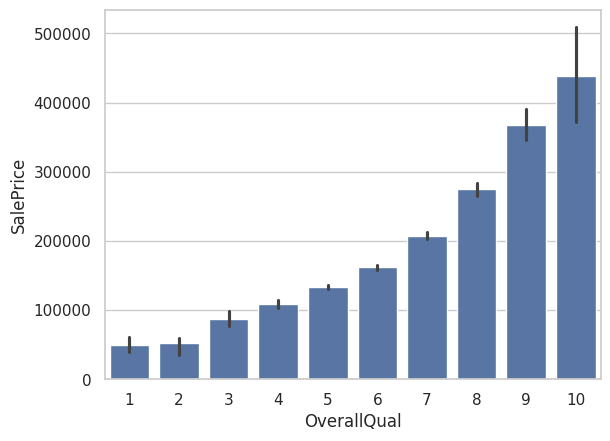

In [7]:
# المعدل هو الذي يعتمد في الأساس 
_=sns.barplot( x="OverallQual", y="SalePrice", data=df) # ,  ci="sd")

In [8]:
#OverallQual  معدا ووسيط المتغير  
df.groupby("OverallQual").SalePrice.agg(["mean", "median"]).T.round(2)

OverallQual,1,2,3,4,5,6,7,8,9,10
mean,50150.0,51770.33,87473.75,108420.66,133523.35,161603.03,207716.42,274735.54,367513.02,438588.39
median,50150.0,60000.00,86250.00,108000.00,133000.00,160000.00,200141.00,269750.00,345000.00,432390.00


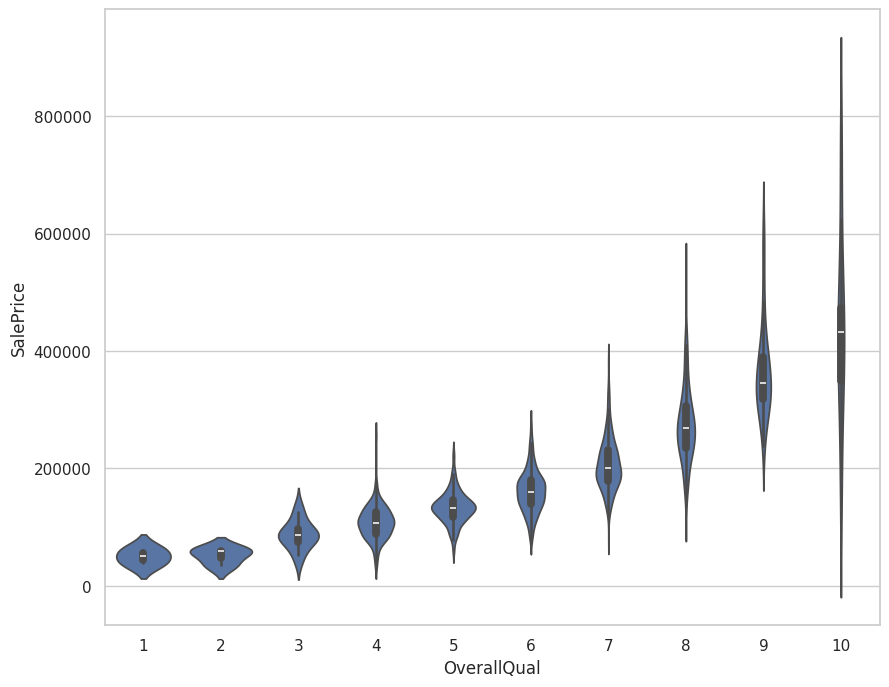

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
_=sns.violinplot( x="OverallQual", y="SalePrice", data=df )

In [10]:
df.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
592,593,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,...,0,2008,WD,Normal,138000,1632,0,2.0,1.224647e-16,-1.000000
195,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,2009,WD,Normal,148500,1295,0,2.5,-5.000000e-01,-0.866025
1112,1113,20,RL,73.0,7100,Pave,NaN,IR1,Lvl,AllPub,...,0,2006,WD,Normal,129900,1124,0,2.0,-5.000000e-01,-0.866025


In [11]:
# تحديد المتغيرات التي تقل تصنيفاتها على 4 
for col in df.select_dtypes(exclude="number").columns:
    if df[col].nunique()< 4:
        print(f" {col} :   {df[col].unique()} values " )

 Street :   ['Pave' 'Grvl'] values 
 Alley :   [nan 'Grvl' 'Pave'] values 
 Utilities :   ['AllPub' 'NoSeWa'] values 
 LandSlope :   ['Gtl' 'Mod' 'Sev'] values 
 MasVnrType :   ['BrkFace' nan 'Stone' 'BrkCmn'] values 
 CentralAir :   ['Y' 'N'] values 
 GarageFinish :   ['RFn' 'Unf' 'Fin' nan] values 
 PavedDrive :   ['Y' 'N' 'P'] values 
 PoolQC :   [nan 'Ex' 'Fa' 'Gd'] values 


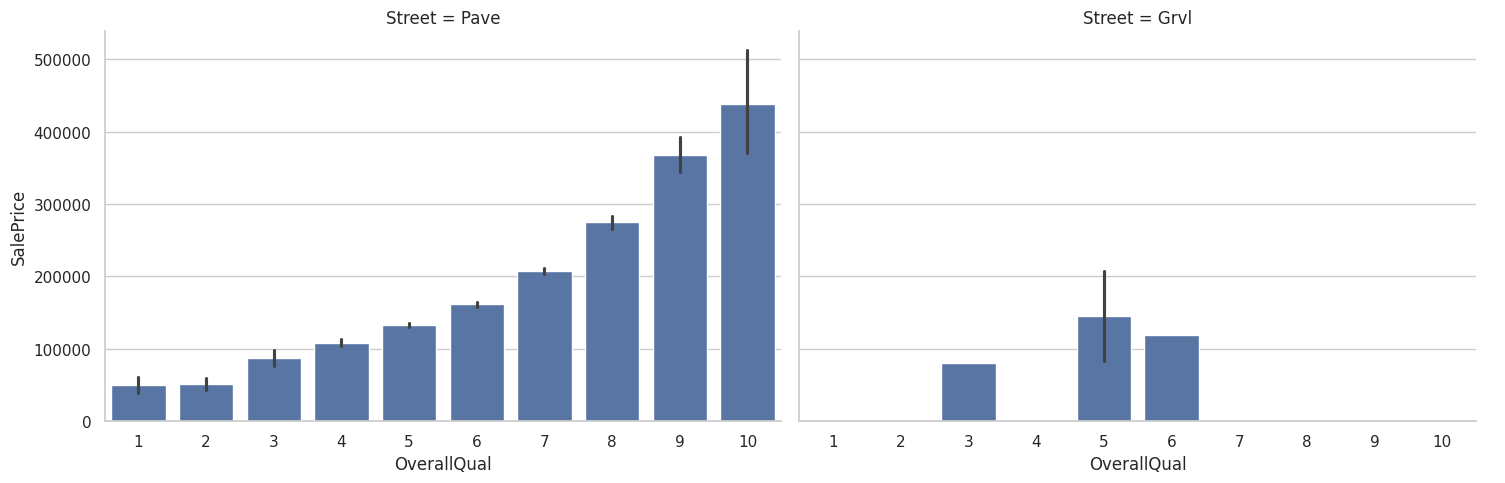

In [12]:
#  معدل  سعر العقار في ضوء تصنيفه حسب نوعية تعبيد الطريق


_=sns.catplot( x="OverallQual", y="SalePrice", col="Street",kind="bar",  data=df, height=5, aspect=1.5)

###   Depicting OUtliers 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/500px-Standard_deviation_diagram.svg.png)

![](https://datajango.com/wp-content/uploads/2019/06/true-distribution.jpg)

In [13]:
df.select_dtypes("number").columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'PoolArea',
       'MiscVal', 'YrSold', 'SalePrice', 'TotalSF', 'TotalPorchSF',
       'TotalBath', 'SnMoSold', 'CsMoSold'],
      dtype='object')

In [14]:
df.select_dtypes("number").sample(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,PoolArea,MiscVal,YrSold,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
783,784,85,NaN,9101,5,6,1978,1978,104.0,1097,...,303,0,0,2009,165500,1699,30,2.0,-0.5,-0.866025
956,957,160,24.0,1300,6,6,1980,1980,0.0,285,...,150,0,0,2009,124000,1023,0,1.5,0.5,-0.866025
839,840,50,70.0,11767,5,6,1946,1995,0.0,352,...,0,0,0,2008,130500,1008,0,1.0,0.5,-0.866025


In [15]:
df.select_dtypes("number").corr()["SalePrice"].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.701179
GarageCars      0.640409
TotalBath       0.631731
GarageArea      0.623431
1stFlrSF        0.605852
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
LotArea         0.263843
BsmtUnfSF       0.214479
TotalPorchSF    0.195739
BedroomAbvGr    0.168213
PoolArea        0.092404
CsMoSold        0.036300
BsmtFinSF2     -0.011378
MiscVal        -0.021190
Id             -0.021917
LowQualFinSF   -0.025606
YrSold         -0.028923
SnMoSold       -0.055101
OverallCond    -0.077856
MSSubClass     -0.084284
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64

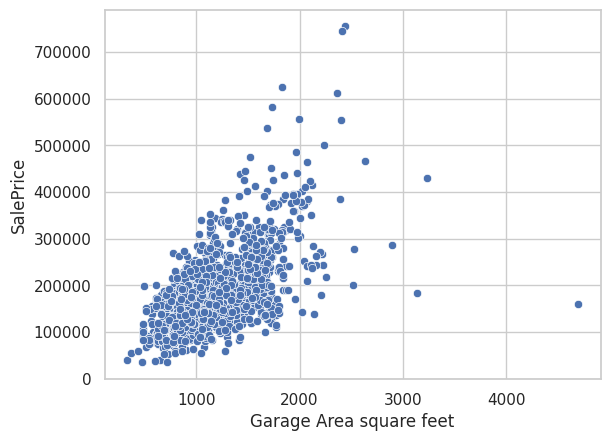

In [16]:
# توزيع  أسعار العقارات في ضوء مساحة الطابق الأول من البناية   
_=sns.scatterplot( data=df,  x="1stFlrSF", y="SalePrice" )
plt.xlabel('Garage Area square feet')
plt.show()

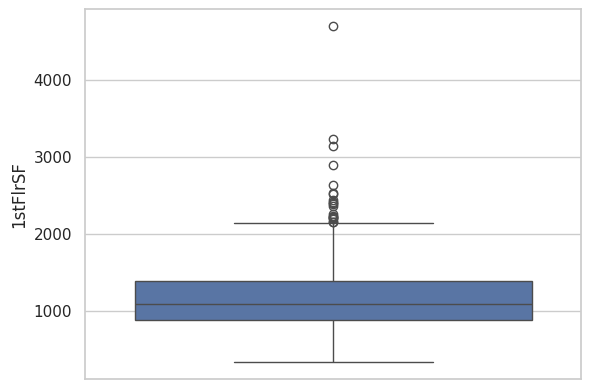

In [17]:
#  مساحة المرآب في ضوء درجة انحدار الطريق 
_=sns.boxplot( df["1stFlrSF"] )

/tmp/ipykernel_5189/3086531964.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _=sns.distplot(df["1stFlrSF"] )


1.377
5.746


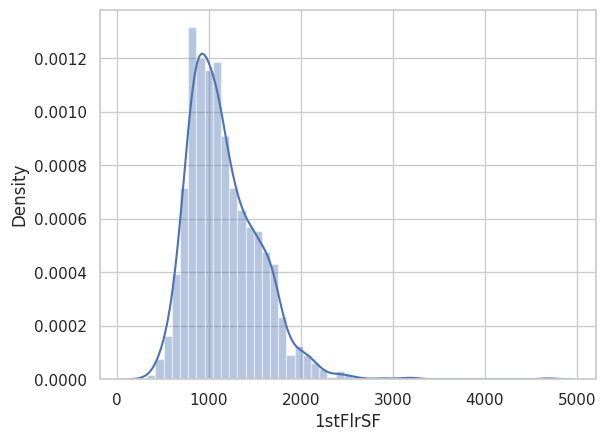

In [18]:
#    توزيع مساحة الطابق الأول للعقارات 
_=sns.distplot(df["1stFlrSF"] )
print(df["1stFlrSF"].skew().round(3))
print(df["1stFlrSF"].kurtosis().round(3))

![](https://c.mql5.com/2/2/8hfgbqhb.gif)

In [19]:
# "1stFlrSF"  تغيير  توزيع بيانات  خاصية مساحة الطابق الأول   
from scipy import stats
import numpy as np
z=np.abs(stats.zscore(df["1stFlrSF"]))
z

0       0.793434
1       0.257140
2       0.627826
3       0.521734
4       0.045611
          ...   
1455    0.542435
1456    2.355701
1457    0.065656
1458    0.218982
1459    0.241615
Name: 1stFlrSF, Length: 1460, dtype: float64

In [20]:
# تحديد القيم المتطرفة
threshold = 3
print(np.where(z > 3))

(array([ 224,  440,  496,  523,  529,  691,  898, 1024, 1044, 1182, 1298,
       1373]),)


In [21]:
# تعميم معالجة القيم المتطرفة على جميع الأعمدة ذات الخاصية الرقمية 
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df.select_dtypes("number")))
z

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,PoolArea,MiscVal,YrSold,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
0,1.730865,0.073375,NaN,0.207142,0.651479,0.517200,1.050994,0.878668,NaN,0.575425,...,0.752176,0.068692,0.087688,0.138777,0.347273,0.220303,0.248063,1.642256,1.331523,1.266956
1,1.728492,0.872563,NaN,0.091886,0.071836,2.179628,0.156734,0.429577,NaN,1.171992,...,1.626195,0.068692,0.087688,0.614439,0.007288,0.333898,0.828163,0.368581,0.767903,0.761516
2,1.726120,0.073375,NaN,0.073480,0.651479,0.517200,0.984752,0.830215,NaN,0.092907,...,0.752176,0.068692,0.087688,0.138777,0.536154,0.004199,0.428750,1.642256,1.541854,0.524484
3,1.723747,0.309859,NaN,0.096897,0.651479,0.517200,1.863632,0.720298,NaN,0.499274,...,0.752176,0.068692,0.087688,1.367655,0.515281,0.230760,2.091355,0.268257,1.331523,1.266956
4,1.721374,0.073375,NaN,0.375148,1.374795,0.517200,0.951632,0.733308,NaN,0.463568,...,0.780197,0.068692,0.087688,0.138777,0.869843,0.785276,0.029337,1.642256,0.002016,2.009429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,NaN,0.260560,0.071836,0.517200,0.918511,0.733308,NaN,0.973018,...,0.752176,0.068692,0.087688,0.614439,0.074560,0.204618,0.447770,0.368581,1.335555,0.217988
1456,1.723747,0.872563,NaN,0.266407,0.071836,0.381743,0.222975,0.151865,NaN,0.759659,...,2.033231,0.068692,0.087688,1.645210,0.366161,0.891585,0.828163,1.005418,1.331523,1.266956
1457,1.726120,0.309859,NaN,0.147810,0.651479,3.078570,1.002492,1.024029,NaN,0.369871,...,0.752176,0.068692,4.953112,1.645210,1.077611,0.220303,0.257573,0.268257,0.767903,0.761516
1458,1.728492,0.872563,NaN,0.080160,0.795151,0.381743,0.704406,0.539493,NaN,0.865548,...,2.168910,0.068692,0.087688,1.645210,0.488523,0.370181,0.236938,0.268257,1.331523,0.217988


In [22]:
df[(z < 3)].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
0,1,60.0,NaN,NaN,8450.0,NaN,NaN,NaN,NaN,NaN,...,0.0,2008,NaN,NaN,208500.0,1404.0,61.0,3.5,8.660254e-01,5.000000e-01
1,2,20.0,NaN,NaN,9600.0,NaN,NaN,NaN,NaN,NaN,...,0.0,2007,NaN,NaN,181500.0,1722.0,0.0,2.5,5.000000e-01,-8.660254e-01
2,3,60.0,NaN,NaN,11250.0,NaN,NaN,NaN,NaN,NaN,...,0.0,2008,NaN,NaN,223500.0,1528.0,42.0,3.5,-1.000000e+00,-1.836970e-16
3,4,70.0,NaN,NaN,9550.0,NaN,NaN,NaN,NaN,NaN,...,0.0,2006,NaN,NaN,140000.0,1398.0,307.0,2.0,8.660254e-01,5.000000e-01
4,5,60.0,NaN,NaN,14260.0,NaN,NaN,NaN,NaN,NaN,...,0.0,2008,NaN,NaN,250000.0,1981.0,84.0,3.5,-2.449294e-16,1.000000e+00


### features  Selection

In [23]:
# تحديد المتغيرات الرقمية التي تقل تصنيفاتها على 4 
for col in df.select_dtypes("number").columns:
    if df[col].nunique()<25:
        print(f" {col} :   {df[col].unique()} values " )

 MSSubClass :   [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] values 
 OverallQual :   [ 7  6  8  5  9  4 10  3  1  2] values 
 OverallCond :   [5 8 6 7 4 2 3 9 1] values 
 LowQualFinSF :   [  0 360 513 234 528 572 144 392 371 390 420 473 156 515  80  53 232 481
 120 514 397 479 205 384] values 
 BedroomAbvGr :   [3 4 1 2 0 5 6 8] values 
 KitchenAbvGr :   [1 2 3 0] values 
 TotRmsAbvGrd :   [ 8  6  7  9  5 11  4 10 12  3  2 14] values 
 Fireplaces :   [0 1 2 3] values 
 GarageCars :   [2 3 1 0 4] values 
 PoolArea :   [  0 512 648 576 555 480 519 738] values 
 MiscVal :   [    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500] values 
 YrSold :   [2008 2007 2006 2009 2010] values 
 TotalBath :   [3.5 2.5 2.  3.  4.  1.  1.5 4.5 6.  5. ] values 
 SnMoSold :   [ 8.66025404e-01  5.00000000e-01 -1.00000000e+00 -2.44929360e-16
 -8.66025404e-01 -8.66025404e-01 -5.00000000e-01  8.66025404e-01
 -5.0000000